# Chapter: Multivariate Statistical Process Monitoring for Nonlinear Processes


# Topic: KPCA-based fault detection

In [1]:
# packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

plt.rcParams.update({'font.size': 14})

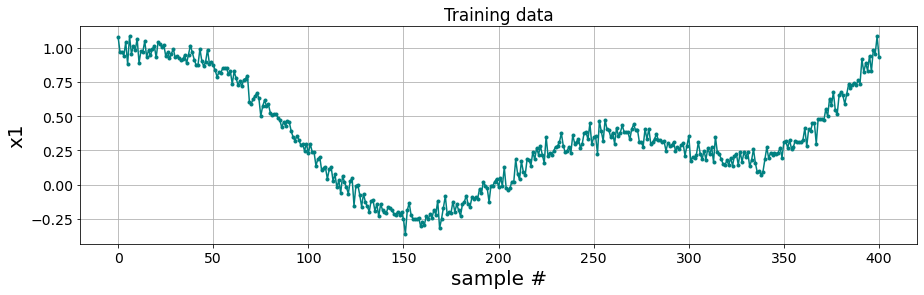

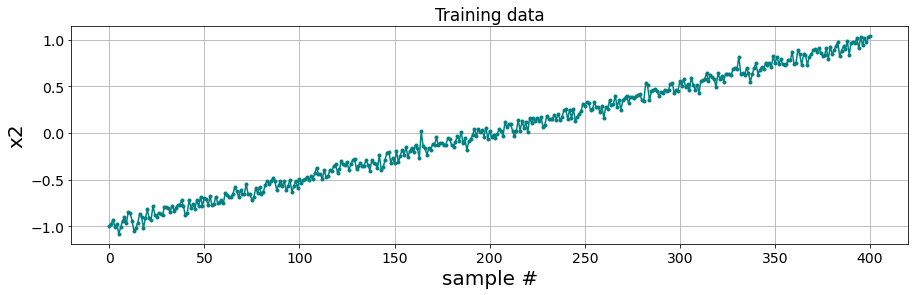

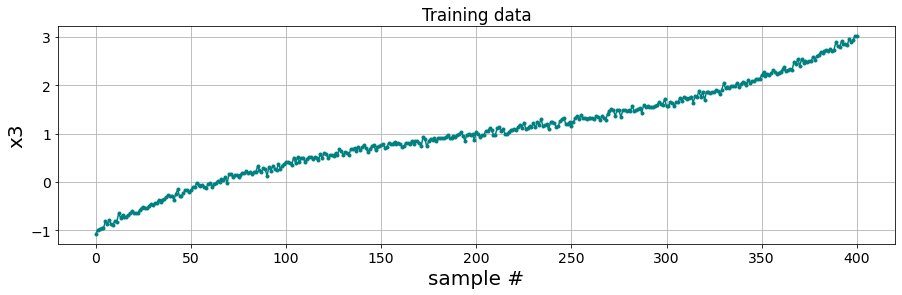

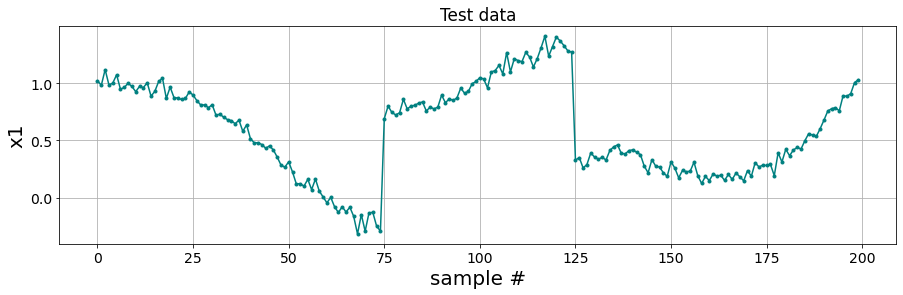

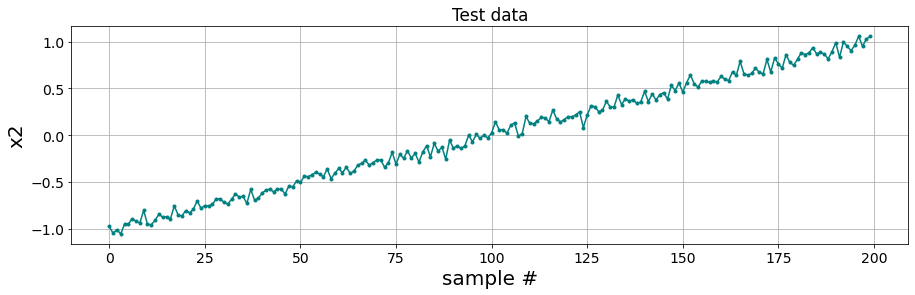

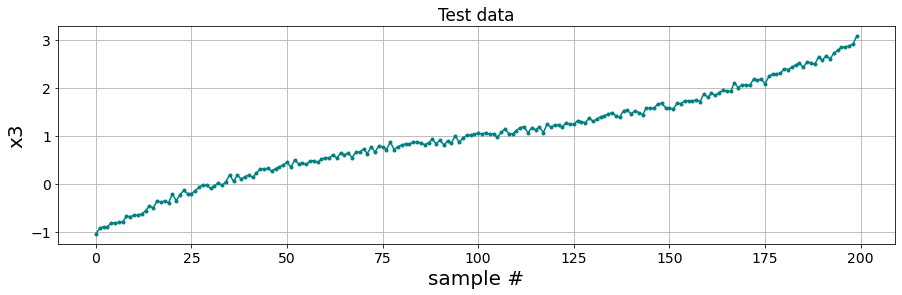

In [3]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          read data
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
X_train = np.loadtxt('KPCA_NOC_data.txt')
X_test = np.loadtxt('KPCA_test_data.txt')

# training data plots
plt.figure(figsize=(15,4))
plt.plot(X_train[:,0],'.-', color='teal')
plt.ylabel('x1', fontsize=20), plt.xlabel('sample #', fontsize=20)
plt.grid(), plt.title('Training data')

plt.figure(figsize=(15,4))
plt.plot(X_train[:,1],'.-', color='teal')
plt.ylabel('x2', fontsize=20), plt.xlabel('sample #', fontsize=20)
plt.grid(), plt.title('Training data')

plt.figure(figsize=(15,4))
plt.plot(X_train[:,2],'.-', color='teal')
plt.ylabel('x3', fontsize=20), plt.xlabel('sample #', fontsize=20)
plt.grid(), plt.title('Training data')

# test data plots
plt.figure(figsize=(15,4))
plt.plot(X_test[:,0],'.-', color='teal')
plt.ylabel('x1', fontsize=20), plt.xlabel('sample #', fontsize=20)
plt.grid(), plt.title('Test data')

plt.figure(figsize=(15,4))
plt.plot(X_test[:,1],'.-', color='teal')
plt.ylabel('x2', fontsize=20), plt.xlabel('sample #', fontsize=20)
plt.grid(), plt.title('Test data')

plt.figure(figsize=(15,4))
plt.plot(X_test[:,2],'.-', color='teal')
plt.ylabel('x3', fontsize=20), plt.xlabel('sample #', fontsize=20)
plt.grid(), plt.title('Test data')

plt.show()

Number of components cumulatively explaining atleast 95% variance:  2


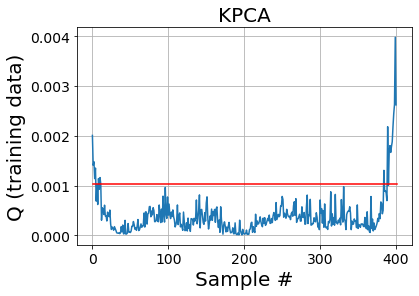

In [4]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          kpca model training
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# scale data
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)

# fit kPCA model
gamma = 1/((5*3)**2)
kpca = KernelPCA(kernel='rbf', gamma=gamma)
kpca.fit(X_train_scaled)

# find number of components to retain
eigVals = kpca.eigenvalues_
eigVals_normalized = eigVals / np.sum(eigVals)
cum_eigVals = 100*np.cumsum(eigVals_normalized) 
n_comp = np.argmax(cum_eigVals >= 95) + 1    
print('Number of components cumulatively explaining atleast 95% variance: ', n_comp)

# compute scores for training data
scores_train = kpca.transform(X_train_scaled) # one column for each of the 38 columns

# compute Q statistics for training data
N = X_train.shape[0]
Q_train = np.zeros((N,1))
for i in range(N):
    Q_train[i] = np.dot(scores_train[i,:], scores_train[i,:]) - np.dot(scores_train[i,:n_comp], scores_train[i,:n_comp])
Q_CL = np.percentile(Q_train, 95)

# monitoring chart for training data
plt.figure(), plt.plot(Q_train), plt.plot([1,len(Q_train)],[Q_CL,Q_CL], color='red')
plt.xlabel('Sample #', fontsize=20), plt.ylabel('Q (training data)', fontsize=20)
plt.title('KPCA', fontsize=20), plt.grid()
plt.show()

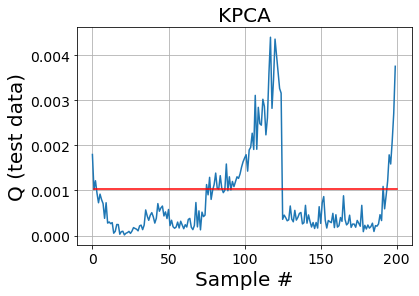

In [5]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          kpca model test
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
X_test_scaled = X_scaler.transform(X_test)

# compute scores for test data
scores_test = kpca.transform(X_test_scaled)

# compute Q statistics for test data
N_test = X_test.shape[0]
Q_test = np.zeros((N_test,1))
for i in range(N_test):
    Q_test[i] = np.dot(scores_test[i,:], scores_test[i,:]) - np.dot(scores_test[i,:n_comp], scores_test[i,:n_comp])

# monitoring chart for test data
plt.figure(), plt.plot(Q_test), plt.plot([1,len(Q_test)],[Q_CL,Q_CL], color='red')
plt.xlabel('Sample #', fontsize=20), plt.ylabel('Q (test data)', fontsize=20)
plt.title('KPCA', fontsize=20), plt.grid()
plt.show()